# Visualizing Data

## Import processed csv files

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

covid19_data = pd.read_csv('covid19_data.csv', index_col='Country', parse_dates=['Date'])
country_map = pd.read_csv('country_map.csv', index_col='Country')

country_map

max_active  current_active  current_active_pct  \
Country                                                              
Afghanistan            20311.0          7489.0           19.559653   
Albania                 4031.0          3811.0           38.713937   
Algeria                11934.0         11934.0           26.246454   
Andorra                  504.0           237.0           19.766472   
Angola                  1550.0          1548.0           55.187166   
...                        ...             ...                 ...   
West Bank and Gaza      8230.0          8209.0           33.545830   
Western Sahara             6.0             1.0           10.000000   
Yemen                    580.0           228.0           11.520970   
Zambia                  2236.0           669.0            5.342170   
Zimbabwe                3190.0          1209.0           18.104223   

                    active_from_peak_pct    Group % Cases Active From Peak  \
Country                                                                      
Afghanistan                    36.871646                         25% - 50%   
Albania                        94.542297                         90% - 99%   
Algeria                       100.000000  100% (Active Cases Still Rising)   
Andorra                        47.023810                         25% - 50%   
Angola                         99.870968  100% (Active Cases Still Rising)   
...                                  ...                               ...   
West Bank and Gaza             99.744836  100% (Active Cases Still Rising)   
Western Sahara                 16.666667                             < 25%   
Yemen                          39.310345                         25% - 50%   
Zambia                         29.919499                         25% - 50%   
Zimbabwe                       37.899687                         25% - 50%   

                   Group % Cases Active  
Country                                  
Afghanistan                       < 25%  
Albania                       25% - 50%  
Algeria                       25% - 50%  
Andorra                           < 25%  
Angola                        50% - 75%  
...                                 ...  
West Bank and Gaza            25% - 50%  
Western Sahara                    < 25%  
Yemen                             < 25%  
Zambia                            < 25%  
Zimbabwe                          < 25%  

[188 rows x 6 columns]

In [14]:
covid19_data

Date  Confirmed  Recovered  Deaths  Active  % Cases Active
Country                                                                     
Afghanistan 2020-01-22        0.0        0.0     0.0     0.0             NaN
Afghanistan 2020-01-23        0.0        0.0     0.0     0.0             NaN
Afghanistan 2020-01-24        0.0        0.0     0.0     0.0             NaN
Afghanistan 2020-01-25        0.0        0.0     0.0     0.0             NaN
Afghanistan 2020-01-26        0.0        0.0     0.0     0.0             NaN
...                ...        ...        ...     ...     ...             ...
Zimbabwe    2020-08-30     6412.0     5061.0   196.0  1155.0       18.013100
Zimbabwe    2020-08-31     6497.0     5221.0   202.0  1074.0       16.530706
Zimbabwe    2020-09-01     6559.0     5241.0   203.0  1115.0       16.999543
Zimbabwe    2020-09-02     6638.0     5250.0   206.0  1182.0       17.806568
Zimbabwe    2020-09-03     6678.0     5263.0   206.0  1209.0       18.104223

[42488 rows x 6 columns]

## Visualizations using matplotlib
- matplotlib can be used to plot basic charts
- provides low level access to axis, figures and plots.
- almost any type of chart is possible, but customization is tedious.
- creating subplots and formatting requires more code
(https://matplotlib.org/gallery/index.html)

(array([14., 14.,  5., 14.,  8.,  6.,  6., 10.,  4.,  5.,  6.,  2.,  5.,
         5.,  5.,  6.,  7.,  5., 10., 51.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

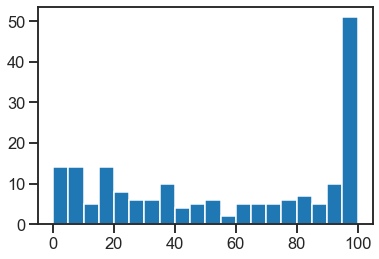

In [15]:
# Creating a histogram
fig,ax = plt.subplots()
ax.hist(country_map['active_from_peak_pct'], bins=20)

Text(0, 0.5, '#Active')

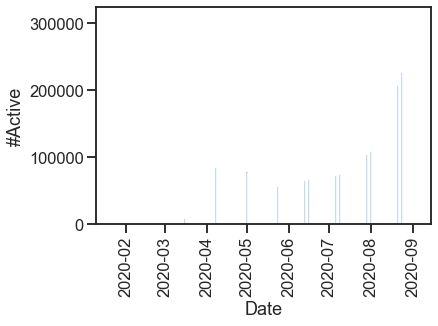

In [49]:
# Creating a bar chart
fig, ax = plt.subplots()
x=covid19_data.loc[['Spain']]['Date']    #[-10:]
y=covid19_data.loc[['Spain']]['Active']  #[-10:]
ax.bar(x,y)
plt.xticks(rotation=90) 
plt.xlabel('Date')
plt.ylabel('#Active')


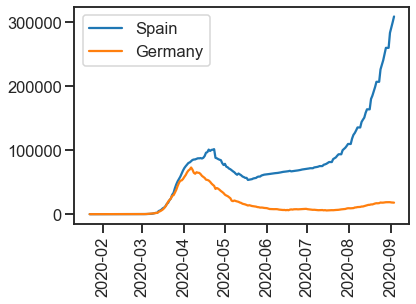

In [50]:
# Creating line chart
fig, ax=plt.subplots()
x1=covid19_data.loc[['Spain']]['Date']
y1=covid19_data.loc[['Spain']]['Active']
x2=covid19_data.loc[['Germany']]['Date']
y2=covid19_data.loc[['Germany']]['Active']
ax.plot(x1,y1,label='Spain')
ax.plot(x2,y2,label='Germany')
plt.xticks(rotation=90) 
plt.legend()

## Visualizations using pandas

Pandas uses matplotlib to create charts. Simple charts can be created directly using the data frame object. Provides a very good wrapper around matplotlib

**DataFrame.plot()** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

<AxesSubplot:ylabel='Frequency'>

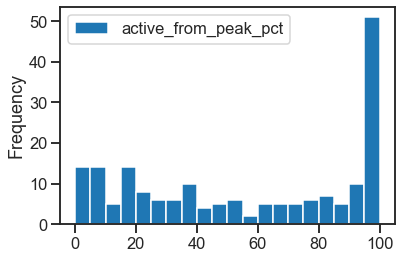

In [18]:
# Creating a histogram
country_map.plot(bins=20, y='active_from_peak_pct', kind='hist')

<AxesSubplot:xlabel='Date'>

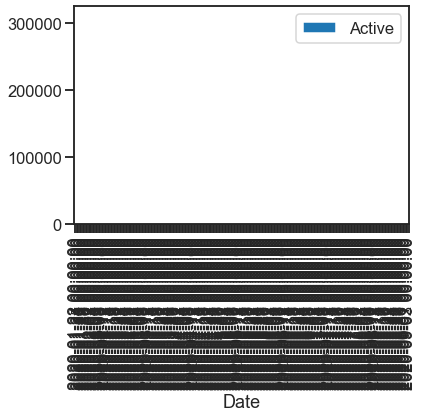

In [52]:
# Creating a bar chart
covid19_data.loc[['Spain']].plot(kind='bar', x='Date', y='Active')
#covid19_data.loc[['Spain']].plot(kind='bar', x='Date', subplots=True, sharey=True)

<AxesSubplot:xlabel='Date'>

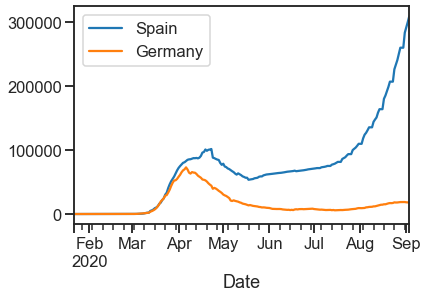

In [20]:
# Creating a line chart
ax = covid19_data.loc[['Spain']].plot(kind='line', x='Date', y='Active', label='Spain')
covid19_data.loc[['Germany']].plot(kind='line', x='Date', y='Active', label='Germany', ax=ax)

## Visualization using seaborn
(https://seaborn.pydata.org/examples/index.html)
- simpler and more intuitive
- provides easy interface to create subplots and groupings easily
- chart are formatted well by default
- additional easy to apply color schemes and styles
- low level access to axis, plots and subplots are not directly available

https://www.geeksforgeeks.org/difference-between-matplotlib-vs-seaborn/

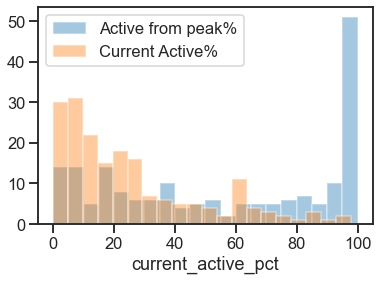

In [21]:
# Creating a histogram
import seaborn as sns

sns.distplot(country_map['active_from_peak_pct'], bins=20, kde=False)
sns.distplot(country_map['current_active_pct'], bins=20, kde=False)
plt.legend(labels=["Active from peak%","Current Active%"])


C:\Users\rohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)


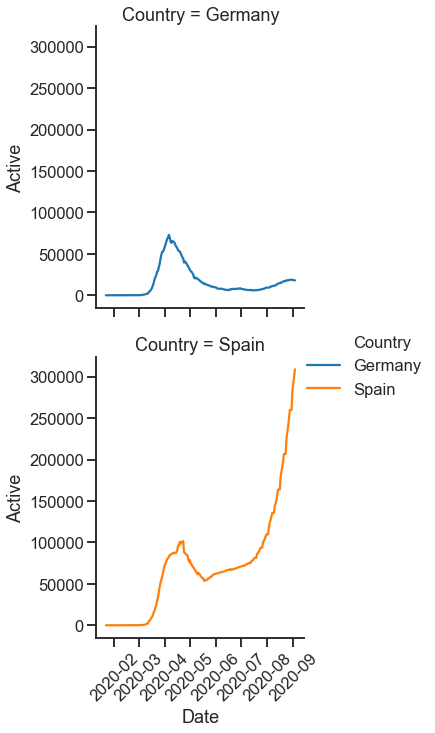

In [26]:
# Creating a line chart
g = sns.relplot(kind='line', x='Date', y='Active', hue='Country', row='Country', data=covid19_data.loc[['Germany','Spain']].reset_index())
g.set_xticklabels(rotation=45
                  
#*Warning due to bug after update https://github.com/pandas-dev/pandas/issues/35684

## Visualizing Covid data using seaborn

C:\Users\rohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)
C:\Users\rohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)
C:\Users\rohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)
C:\Users\rohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)
C:\Users\rohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:911: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(curr_labels, **kwargs)
C:\Users\rohit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:91

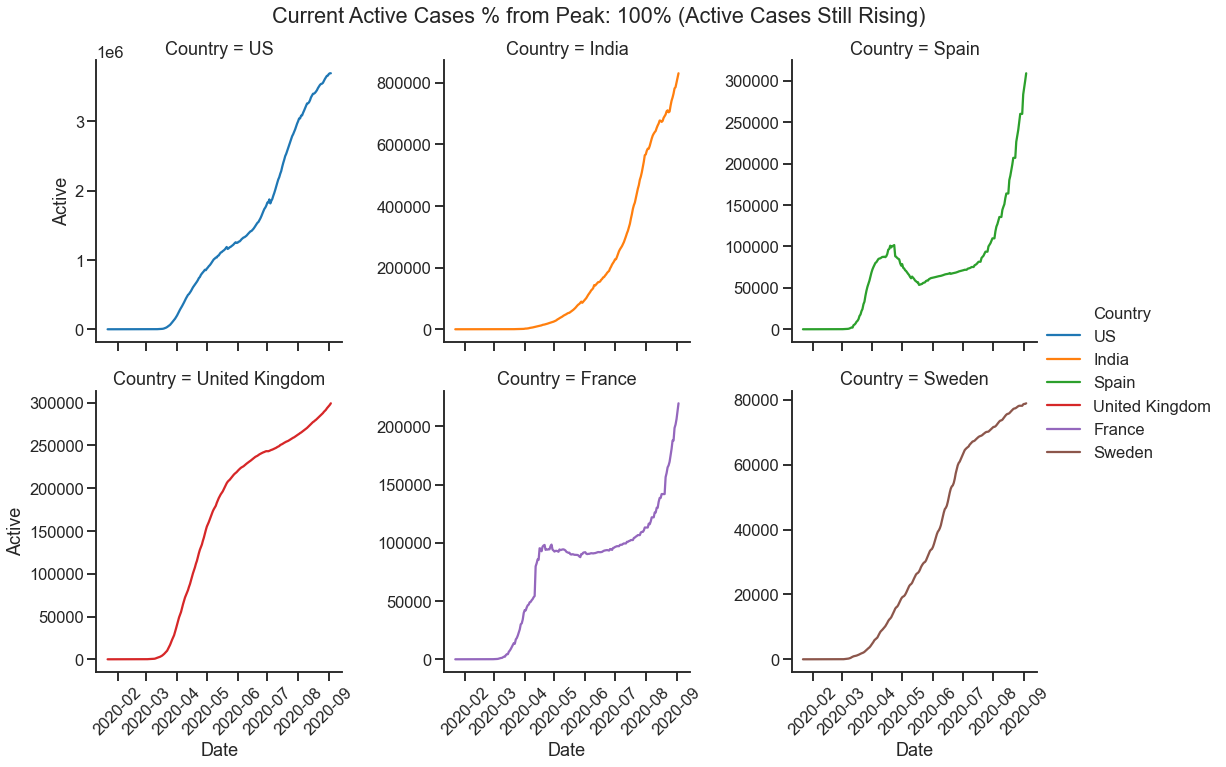

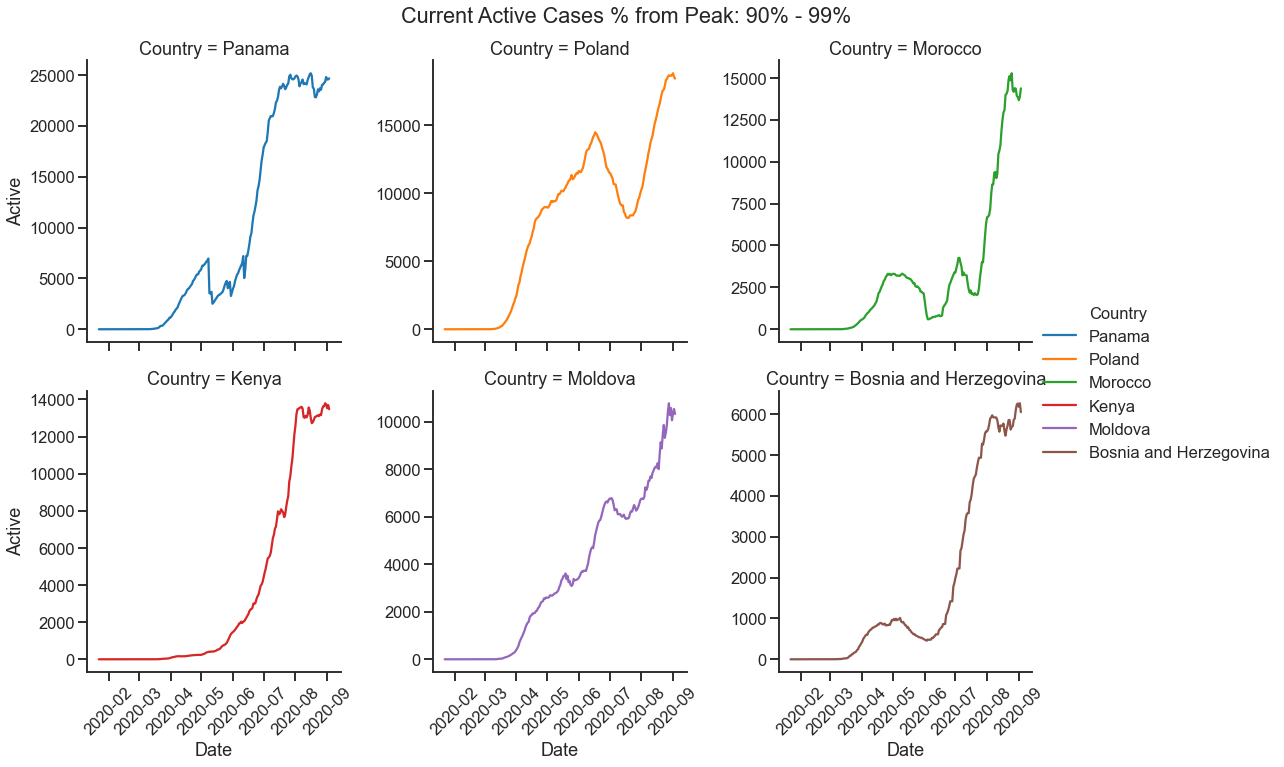

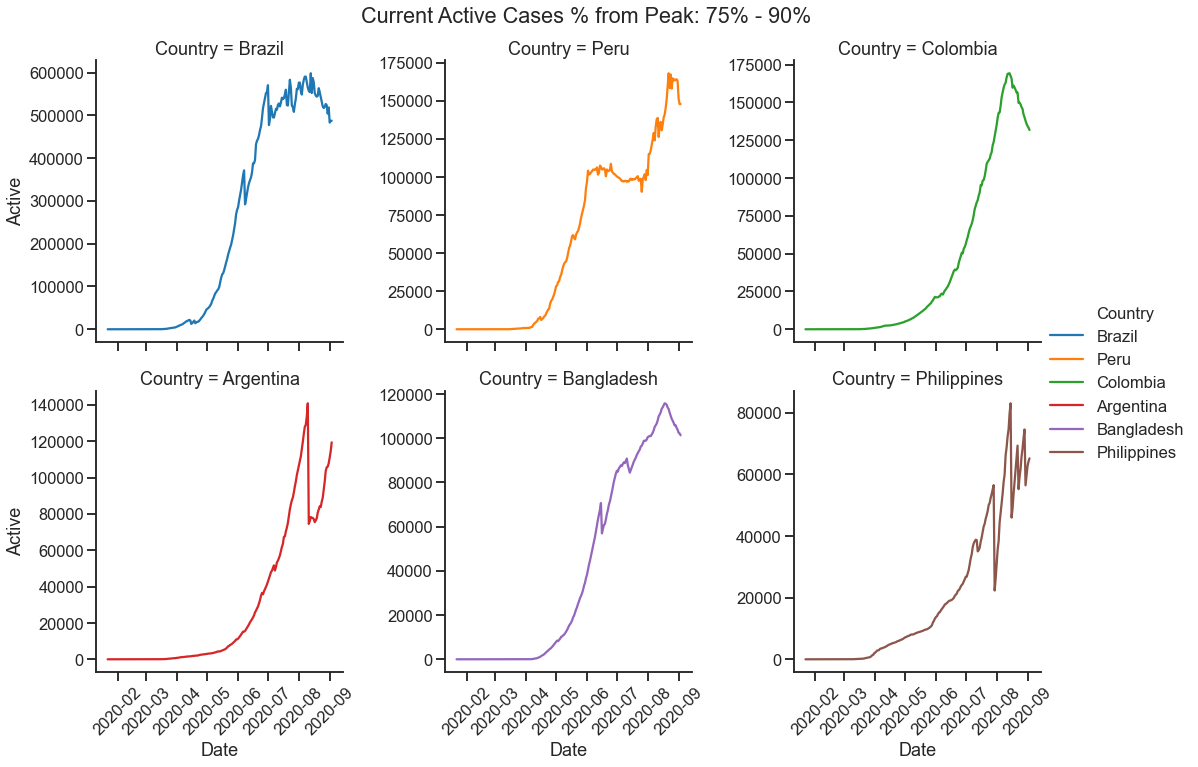

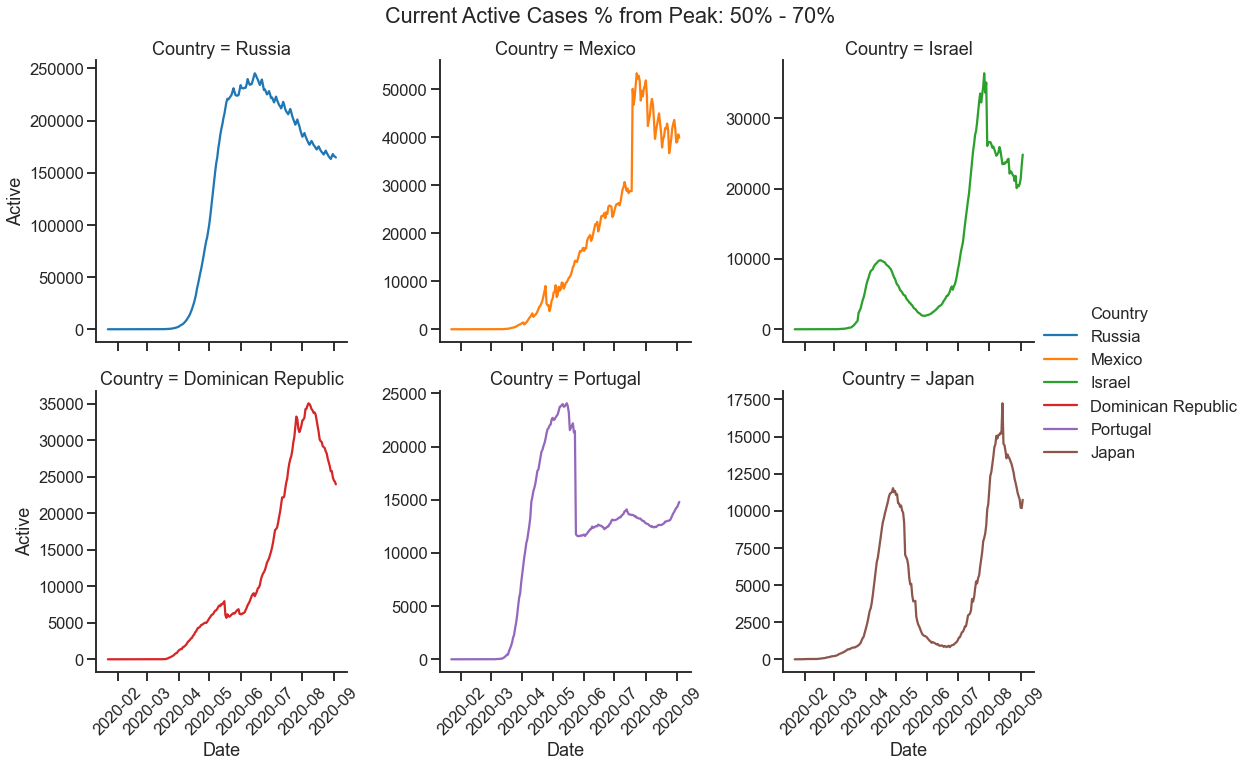

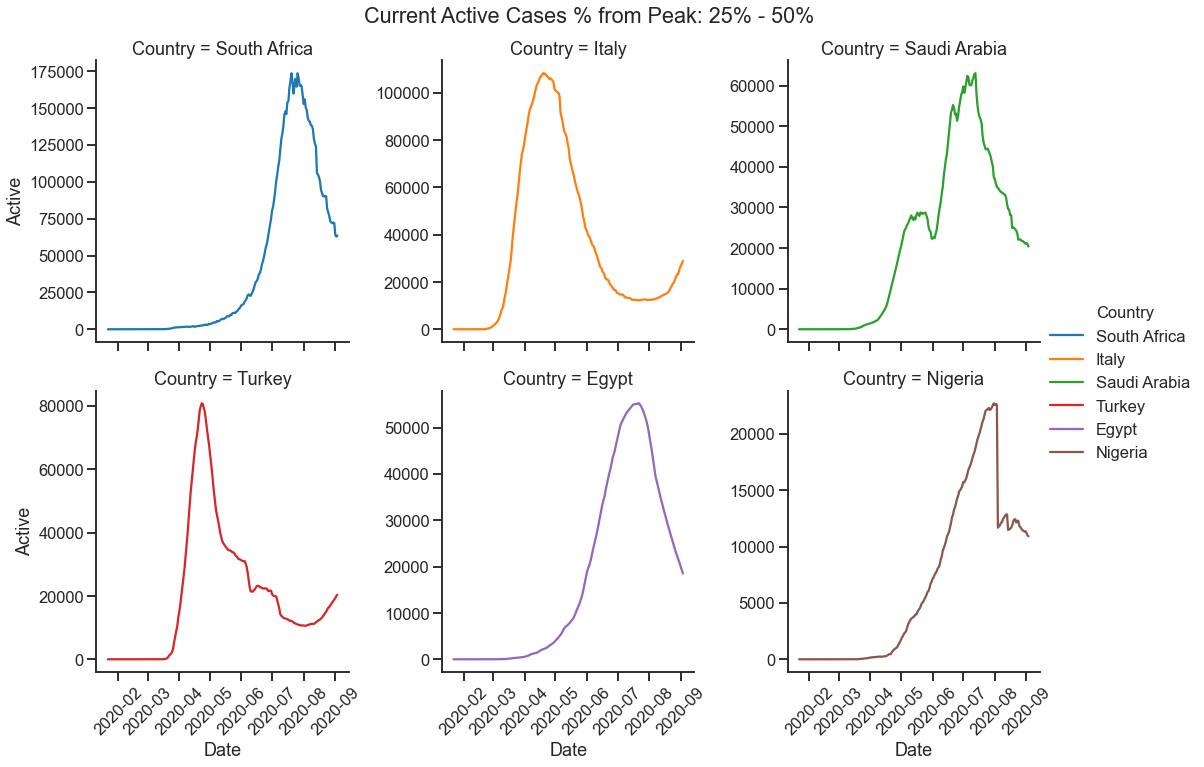

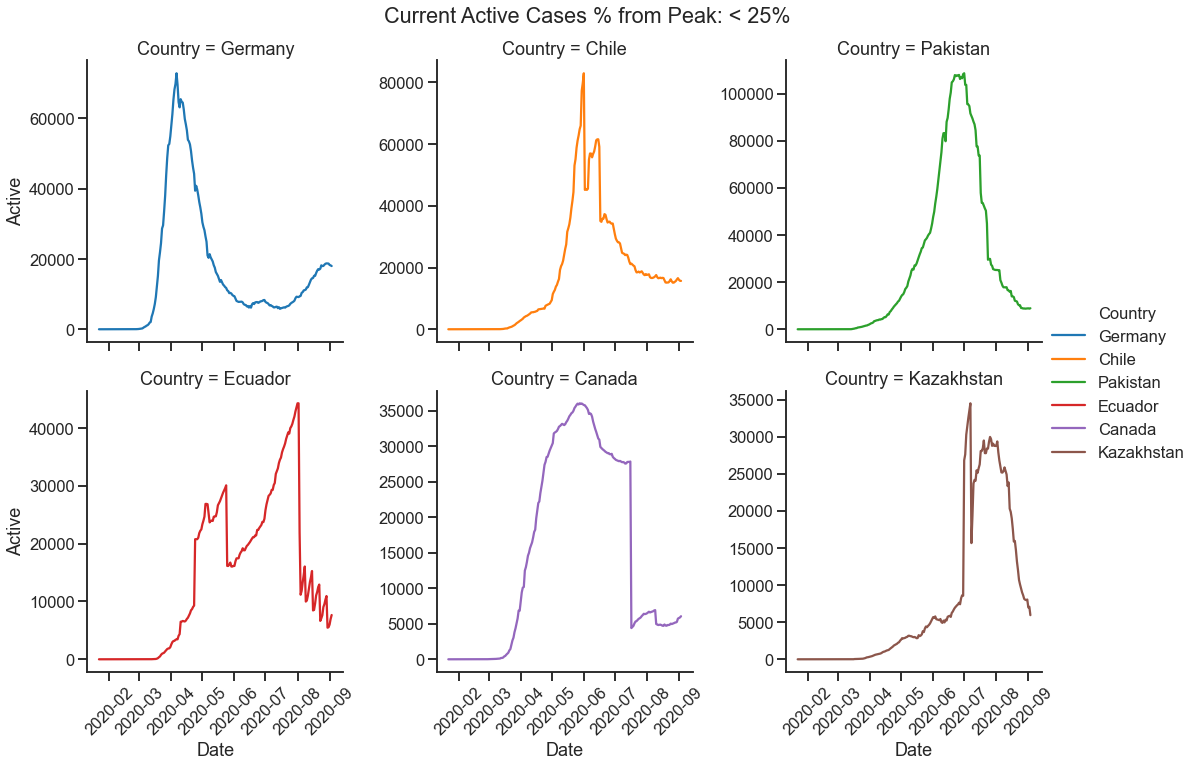

In [27]:
# Plotting Charts
max_countries_to_plot = 6
sns.set_style('ticks')
sns.set_context('talk')

bin_active_from_peak_pct_labels = ['< 25%', '25% - 50%', '50% - 70%', '75% - 90%', '90% - 99%', '100% (Active Cases Still Rising)']

# Plotting Active Cases
for country_grp in reversed(bin_active_from_peak_pct_labels):
    list_country = country_map[country_map['Group % Cases Active From Peak']==country_grp].sort_values('current_active', ascending=False).index.unique()[:max_countries_to_plot]
    plot_df = covid19_data.loc[list_country].reset_index()
    g = sns.relplot(x='Date', y='Active', data=plot_df, col='Country', col_wrap=3, col_order=list_country, hue='Country', kind='line', facet_kws={'sharey':None})
    g.set_xticklabels(rotation=45)
    g.fig.suptitle("Current Active Cases % from Peak: "+country_grp, y=1.02)


## Using Plotly to create interactive charts
(https://dash-gallery.plotly.host/Portal/)

- Interactive charts with good formatting
- Build enterprise dashboards

In [38]:
import plotly.express as px

data = covid19_data.loc[['Spain','Germany','India','US','Australia','Iran','Russia','France','Italy']].reset_index()

fig = px.line(data, x="Date", y="% Cases Active", facet_col="Country", facet_col_wrap=3, title="Active Cases", color='Country')
fig.show()

## Data Visualization in Python - Takeaways
- There are several libraries in python for data visualization
- Matplotlib is the most widely used libray used by analysts and data scientists for data exploration and visualization
- Pandas can also be used for qucik data visualization
- Seaborn is good wrapper around matplotlib, which provides easier syntax and better formatting via styles. It also allows to use columns from data to split graphs into columns, rows or colors
- Large number of charts used for statistical analysis and ML can be created easily using seaborn
- To create interactive charts and UX friendly dashboards, we need to use libraries like plotly and bookeh

The choice of library to use would depend largely on the use case that the visualization needs to serve.